# Analysis for 20230703-090301.xlsx

## 0. Imports

In [116]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from ast import literal_eval
from typing import List, Union
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
from scipy import interpolate
import calendar
import ast
pd.set_option('display.max_columns', None)

## 1. Read the data

In [117]:
excel_sheet_path = r'C:\python\personal\my-open\notebooks\20230703-090301\data\20230703-090301.xlsx'
data = pd.read_excel(excel_sheet_path, engine='openpyxl')

In [118]:
data.head()

,FolderName,rated_photovoltaic_kilowatts,simulation_time_series_resolution_in_minutes,energy_management_system_time_series_resolution_in_minutes,max_storage_asset_energy_in_kilowatt_hour,min_storage_asset_energy_in_kilowatt_hour,max_storage_asset_active_power_in_kilowatts,min_storage_asset_active_power_in_kilowatts,initial_storage_asset_energy_level_percentage,required_storage_asset_terminal_energy_level_percentage,storage_asset_absolute_active_power_in_kilowatts,storage_asset_degradation_ratio_in_euros_per_kilowatt_hour,storage_asset_charging_efficiency_percentage,storage_asset_charging_efficiency_for_the_optimizer_percentage,max_inside_degree_celsius,min_inside_degree_celsius,initial_inside_degree_celsius,max_consumed_electric_heating_kilowatts,max_consumed_electric_cooling_kilowatts,heat_pump_coefficient_of_performance,chiller_coefficient_of_performance,building_thermal_capacitance_in_kilowatts_hour_per_degree_celsius,building_thermal_resistance_in_degree_celsius_per_kilowatts,export_prices_in_euros_per_kilowatt_hour,demand_charge_in_euros_per_kilowatt,max_import_kilowatts,max_export_kilowatts,offered_kilowatts_in_frequency_response,max_frequency_response_state_of_charge,min_frequency_response_state_of_charge,frequency_response_price_in_euros_per_kilowatt_hour,grid_1_voltage_level_in_kilo_volts,grid_2_voltage_level_in_kilo_volts,grid_3_voltage_level_in_kilo_volts,transformer_apparent_power_in_mega_volt_ampere,length_from_bus_2_to_bus_3_in_km,blackout_start_time_in_hours,blackout_stop_time_in_hours,save_plots,photovoltaic_generation_data_file_path,electric_load_data_file_path,data_strategy,ambient_temperature_file_path,market,import_period_prices.P1,import_period_prices.P2,import_period_prices.P3,import_period_prices.P4,import_period_prices.P5,import_period_prices.P6,buses_voltage_angle_in_degrees,buses_active_power_in_kilowatts,buses_reactive_power_in_kilovolt_ampere_reactive,market_active_power_in_kilowatts,market_reactive_power_in_kilovolt_ampere_reactive,buses_voltage_in_per_unit,active_power_demand_in_kilowatts,revenue,active_power_demand_base_in_kilowatts,imported_active_power_in_kilowatts,exported_active_power_in_kilowatts,building_power_consumption_in_kilowatts,ambient_temperature_in_degree_celsius,building_internal_temperature_in_celsius_degrees,hvac_active_power_in_kilowatts,storage_asset_accumulated_power_in_kilowatts,storage_asset_charge_or_discharge_power_in_kilowatts,storage_asset_active_power_in_kilowatts,storage_asset_energy_level_in_kilowatt_hour
0,20230703-090332_1_Commercial-275-bed Hospital,400,1,15,500,0,500,0,80,100,NaN,NaN,100,100,25,21,21,400,400,3,1,500,0.0337,0.189,0,500,-500,0,0.6,0.4,0.0059,20,0.4,0.4,0.4,0.1,11,12.5,False,data/solar_radiation/pamplona/1_min/2022-01-01...,data/electric_loads/considered_building_types,MeteoNavarra,data/ambient_temperature/pamplona/20220115_amb...,Spanish,0.1395,0.1278,0.111,0.1014,0.0927,0.0871,"[[0.0, -2.395169764780389, -3.259090154286426]...","[[-288.11006215918394, 0.0, 250.71931564840816...","[[-16.356504368084906, 0.0, 0.0], [-16.3565043...","[288.11006215918394, 288.11006215918394, 288.1...","[16.356504368084906, 16.356504368084906, 16.35...","[[1.0, 0.9882421049272108, 0.8728775078405766]...","[6.553399999999999, 6.553399999999999, 6.55339...",821.92,"[6.553400000000001, 6.553400000000001, 6.55340...","[[499.9999999966398], [499.99999999663976], [4...","[[249.28068434823166], [246.71989084925588], [...","[[244.16591564814996], [246.72670914695823], [...","[-3.6851740626763085, -3.9440702927850753, -4....","[20.999999999999634, 21.00000000013551, 21.000...","[244.16591564814996, 244.16591564814996, 244.1...","[244.16591564814996, 246.72670914695823, 252.0...","[2.581697340334497e-10, 4.2562804042116843e-10...","[2.581697340334497e-10, 2.581697340334497e-10,...","[400.0, 400.0000000000043, 400.00000000000864,..."
1,20230703-090401_2_Commercial-275-bed Hospital,400,1,15,500,0,500,0,80,100,NaN,NaN,100,100,25,21,21,400,400,3,1,500,0.0337,0.189,0,500,-500,0,0.6,0

In [119]:
data.shape

(72, 69)

In [120]:
data.columns

Index(['FolderName', 'rated_photovoltaic_kilowatts',
       'simulation_time_series_resolution_in_minutes',
       'energy_management_system_time_series_resolution_in_minutes',
       'max_storage_asset_energy_in_kilowatt_hour',
       'min_storage_asset_energy_in_kilowatt_hour',
       'max_storage_asset_active_power_in_kilowatts',
       'min_storage_asset_active_power_in_kilowatts',
       'initial_storage_asset_energy_level_percentage',
       'required_storage_asset_terminal_energy_level_percentage',
       'storage_asset_absolute_active_power_in_kilowatts',
       'storage_asset_degradation_ratio_in_euros_per_kilowatt_hour',
       'storage_asset_charging_efficiency_percentage',
       'storage_asset_charging_efficiency_for_the_optimizer_percentage',
       'max_inside_degree_celsius', 'min_inside_degree_celsius',
       'initial_inside_degree_celsius',
       'max_consumed_electric_heating_kilowatts',
       'max_consumed_electric_cooling_kilowatts',
       'heat_pump_coefficien

## 2.Reformat list columns

The list or array type columns are displayed as string type, let's modify them:

In [121]:
# Format storage_asset_active_power_in_kilowatts column
storage_asset_active_power_in_kilowatts_list = []
for _, row in data.iterrows():
    storage_asset_active_power_in_kilowatts = float(row.storage_asset_active_power_in_kilowatts.split(',')[0].split('[')[1])
    storage_asset_active_power_in_kilowatts_list.append(storage_asset_active_power_in_kilowatts)
data['storage_asset_active_power_in_kilowatts'] = storage_asset_active_power_in_kilowatts_list

In [122]:
for column in data.columns:
    try:
        data[column] = data[column].map(literal_eval)
    except:
        print(f'{column} column not possible to transform')

FolderName column not possible to transform
rated_photovoltaic_kilowatts column not possible to transform
simulation_time_series_resolution_in_minutes column not possible to transform
energy_management_system_time_series_resolution_in_minutes column not possible to transform
max_storage_asset_energy_in_kilowatt_hour column not possible to transform
min_storage_asset_energy_in_kilowatt_hour column not possible to transform
max_storage_asset_active_power_in_kilowatts column not possible to transform
min_storage_asset_active_power_in_kilowatts column not possible to transform
initial_storage_asset_energy_level_percentage column not possible to transform
required_storage_asset_terminal_energy_level_percentage column not possible to transform
storage_asset_absolute_active_power_in_kilowatts column not possible to transform
storage_asset_degradation_ratio_in_euros_per_kilowatt_hour column not possible to transform
storage_asset_charging_efficiency_percentage column not possible to transform


In [123]:
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64'), dtype('bool')],
      dtype=object)

Get the columns that have an array like format (array, list, etc.):

In [124]:
list_columns = []
for column in data.columns:
    print(column)
    print(type(column))
    if isinstance(data[column][0], list):
        list_columns.append(column)

FolderName
<class 'str'>
rated_photovoltaic_kilowatts
<class 'str'>
simulation_time_series_resolution_in_minutes
<class 'str'>
energy_management_system_time_series_resolution_in_minutes
<class 'str'>
max_storage_asset_energy_in_kilowatt_hour
<class 'str'>
min_storage_asset_energy_in_kilowatt_hour
<class 'str'>
max_storage_asset_active_power_in_kilowatts
<class 'str'>
min_storage_asset_active_power_in_kilowatts
<class 'str'>
initial_storage_asset_energy_level_percentage
<class 'str'>
required_storage_asset_terminal_energy_level_percentage
<class 'str'>
storage_asset_absolute_active_power_in_kilowatts
<class 'str'>
storage_asset_degradation_ratio_in_euros_per_kilowatt_hour
<class 'str'>
storage_asset_charging_efficiency_percentage
<class 'str'>
storage_asset_charging_efficiency_for_the_optimizer_percentage
<class 'str'>
max_inside_degree_celsius
<class 'str'>
min_inside_degree_celsius
<class 'str'>
initial_inside_degree_celsius
<class 'str'>
max_consumed_electric_heating_kilowatts
<class

Check the list column lengths:

In [125]:
for list_column in list_columns:
    print(f'{list_column} length: {len(data[list_column])}')

market_active_power_in_kilowatts length: 72
market_reactive_power_in_kilovolt_ampere_reactive length: 72
active_power_demand_in_kilowatts length: 72
active_power_demand_base_in_kilowatts length: 72
imported_active_power_in_kilowatts length: 72
exported_active_power_in_kilowatts length: 72
building_power_consumption_in_kilowatts length: 72
ambient_temperature_in_degree_celsius length: 72
building_internal_temperature_in_celsius_degrees length: 72
hvac_active_power_in_kilowatts length: 72
storage_asset_accumulated_power_in_kilowatts length: 72
storage_asset_charge_or_discharge_power_in_kilowatts length: 72
storage_asset_energy_level_in_kilowatt_hour length: 72


## 3.Plots

### 3.1. Base Demand vs Imports plot

Plot created as it appears in the original OPEN paper like this.

In [126]:
simulation_time_series_resolution_in_hours = data.simulation_time_series_resolution_in_minutes[0] / 60
hours_per_day = 24
number_of_time_intervals_per_day = int(hours_per_day / simulation_time_series_resolution_in_hours)

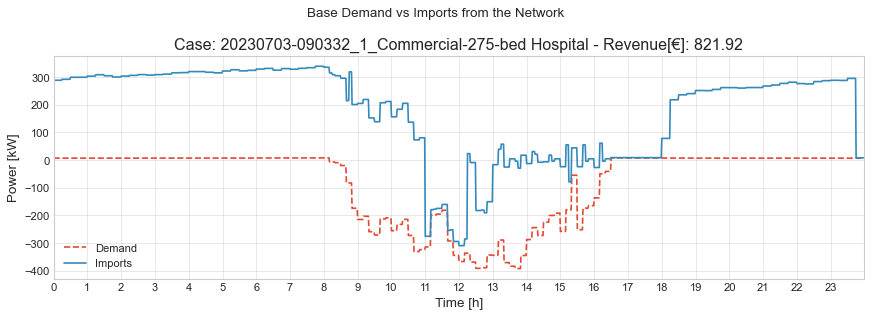

In [127]:
hours = simulation_time_series_resolution_in_hours * np.arange(number_of_time_intervals_per_day)
max_time = max(hours)
figure = plt.figure(num=None, figsize=(11, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hours, data.active_power_demand_base_in_kilowatts[0], '--', label='Demand')
plt.plot(hours, data.market_active_power_in_kilowatts[0], label='Imports')
plt.suptitle('Base Demand vs Imports from the Network')
subtitle = 'Case: ' + str(data.FolderName[0]) + ' - ' + 'Revenue[€]: ' + str(data.revenue[0])
plt.title(subtitle)
plt.ylabel('Power [kW]')
plt.xlabel('Time [h]')
plt.xlim(0, max_time)
plt.xticks(np.arange(0, max_time, step=1))
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()

### 3.2. Plot and save the list-array like data

In [128]:
number_of_rows = data.shape[0]
number_of_rows

72

In [129]:
number_of_columns = data.shape[1]
number_of_plots = number_of_rows * number_of_columns

In [130]:
list_columns

['market_active_power_in_kilowatts',
 'market_reactive_power_in_kilovolt_ampere_reactive',
 'active_power_demand_in_kilowatts',
 'active_power_demand_base_in_kilowatts',
 'imported_active_power_in_kilowatts',
 'exported_active_power_in_kilowatts',
 'building_power_consumption_in_kilowatts',
 'ambient_temperature_in_degree_celsius',
 'building_internal_temperature_in_celsius_degrees',
 'hvac_active_power_in_kilowatts',
 'storage_asset_accumulated_power_in_kilowatts',
 'storage_asset_charge_or_discharge_power_in_kilowatts',
 'storage_asset_energy_level_in_kilowatt_hour']

In [131]:
formatting_dict = {'market_active_power_in_kilowatts': 
                   {'name': 'Market Active Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                   'market_reactive_power_in_kilovolt_ampere_reactive': 
                   {'name': 'Market Reactive Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Reactive Power [kVA]'},
                   'active_power_demand_in_kilowatts': 
                   {'name': 'Solar PV generation',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'active_power_demand_base_in_kilowatts': 
                   {'name': 'Solar PV generation',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'imported_active_power_in_kilowatts': 
                   {'name': 'Imported Active Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'exported_active_power_in_kilowatts': 
                   {'name': 'Exported Active Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'building_power_consumption_in_kilowatts': 
                   {'name': 'Building Electrical Consumption',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                   'ambient_temperature_in_degree_celsius': 
                   {'name': 'Ambient Temperature',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Temperature [°C]'},
                   'building_internal_temperature_in_celsius_degrees': 
                   {'name': 'Building Internal Temperature',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Temperature [°C]',
                   'max_temperature_inside': 25,
                   'min_temperature_inside': 21},
                    'hvac_active_power_in_kilowatts': 
                   {'name': 'HVAC consumption',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'storage_asset_accumulated_power_in_kilowatts': 
                   {'name': 'Stored Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'storage_asset_charge_or_discharge_power_in_kilowatts': 
                   {'name': 'Storage Asset System Charged and Discharged Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'storage_asset_energy_level_in_kilowatt_hour': 
                   {'name': 'Storage Asset Energy Level',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]',
                   'min_y_axis_value': 0}
                   
                  }
                   

Save the plots in PDF format:

In [132]:
# To avoid having to run the following cell every time
save_plots_in_pdf = False

In [133]:
%%time
if save_plots_in_pdf is True:
    hours_per_day = 24
    for number_of_row in np.arange(0, number_of_rows):
        row_data = data.iloc[number_of_row]
        figure = plt.figure(num=None, figsize=(15, 30), dpi=80, facecolor='w', edgecolor='k')
        amount_of_subplots = len(list_columns)
        for list_column_index in np.arange(0, amount_of_subplots):
            list_column = list_columns[list_column_index]
            formatting_parameters = formatting_dict[list_column]
            column_data = row_data[list_column]
            data_length = len(column_data)
            resolution = hours_per_day / data_length 
            hours_per_resolution = np.arange(start=0, stop=hours_per_day, step=resolution)
            plt.subplot(amount_of_subplots, 1, list_column_index + 1)
            plt.plot(hours_per_resolution, column_data)
            if 'max_temperature_inside' in formatting_parameters:
                max_temperature_inside_array = np.full(shape=hours_per_resolution.shape, 
                                                       fill_value=formatting_parameters['max_temperature_inside'])
                plt.plot(hours_per_resolution, max_temperature_inside_array, color='red', linestyle='--',
                        label='Maximum')
            if 'min_temperature_inside' in formatting_parameters:
                min_temperature_inside_array = np.full(shape=hours_per_resolution.shape, 
                                                       fill_value=formatting_parameters['min_temperature_inside'])
                plt.plot(hours_per_resolution, min_temperature_inside_array, color='red', linestyle='--',
                        label='Minimum')
            case_name = row_data['FolderName']
            splitted_case_name = case_name.split('_')
            month_number = int(splitted_case_name[1])
            month_name = calendar.month_name[month_number]
            plot_title = splitted_case_name[2]
            name = formatting_parameters['name']
            plt.title(f'{plot_title} - {name} ({month_name})')
            plt.grid(True, alpha=0.5)
            plt.xticks(np.arange(0, hours_per_resolution[-1] + 1, step=1))
            plt.xlabel(formatting_parameters['x_axis_name'])
            plt.ylabel(formatting_parameters['y_axis_name'])
            if 'min_y_axis_value' in formatting_parameters:
                max_y = np.max(column_data) + 100
                plt.ylim(0, )
            if 'min_temperature_inside' in formatting_parameters:
                plt.legend()
            figure.tight_layout()
        pp = PdfPages(f'plots/{case_name}.pdf')
        pp.savefig()
        pp.close()
        plt.close(figure)

CPU times: total: 0 ns
Wall time: 0 ns


In [134]:
number_of_plots = len(os.listdir('plots'))
print('number_of_plots:', number_of_plots)

number_of_plots: 73


### 3.3. Format the plots

In [135]:
test_data = data.iloc[0]
test_data

FolderName                                                        20230703-090332_1_Commercial-275-bed Hospital
rated_photovoltaic_kilowatts                                                                                400
simulation_time_series_resolution_in_minutes                                                                  1
energy_management_system_time_series_resolution_in_minutes                                                   15
max_storage_asset_energy_in_kilowatt_hour                                                                   500
                                                                                    ...                        
hvac_active_power_in_kilowatts                                [244.16591564814996, 244.16591564814996, 244.1...
storage_asset_accumulated_power_in_kilowatts                  [244.16591564814996, 246.72670914695823, 252.0...
storage_asset_charge_or_discharge_power_in_kilowatts          [2.581697340334497e-10, 4.2562804042116843

In [136]:
type((test_data['active_power_demand_base_in_kilowatts']))


list

In [137]:
def plot_demand_base_and_total_imported_power(simulation_time_series_resolution_in_hours: float,
                                              number_of_time_intervals_per_day: int,
                                              active_power_demand_base_in_kilowatts: np.ndarray,
                                              market_active_power_in_kilowatts: np.ndarray, case: str,
                                              revenue: float, current_time: str, plots_path: Union[str, None],
                                              save_plot: bool) -> None:
    hours = simulation_time_series_resolution_in_hours * np.arange(number_of_time_intervals_per_day)
    max_time = max(hours)
    figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(hours, active_power_demand_base_in_kilowatts, '--', label='Demand')
    plt.plot(hours, market_active_power_in_kilowatts, label='Imports')
    plt.suptitle('Base Demand vs Imports from the Network')
    subtitle = 'Case: ' + str(case) + ' - ' + 'Revenue[€]: ' + str(revenue)
    plt.title(subtitle)
    plt.ylabel('Power [kW]')
    plt.xlabel('Time [h]')
    plt.xlim(0, max_time)
    plt.xticks(np.arange(0, max_time, step=1))
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.tight_layout()
    if save_plot:
        figure.savefig(f'{plots_path}/{current_time}_{case}_demand_base_and_total_imported_power.png')
    else:
        plt.show()

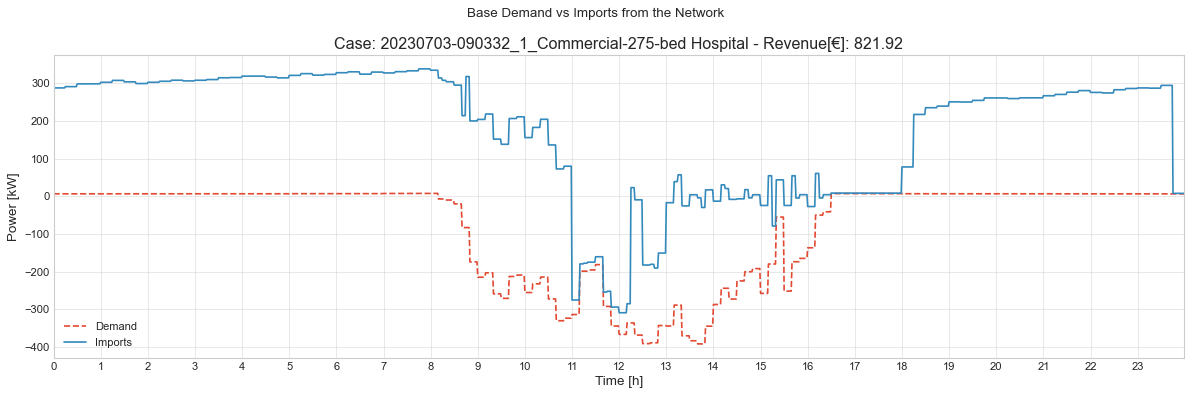

In [138]:
hours_per_day = 24
simulation_time_series_resolution_in_minutes = test_data['simulation_time_series_resolution_in_minutes']
simulation_time_series_resolution_in_hours = simulation_time_series_resolution_in_minutes / 60
number_of_time_intervals_per_day = int(hours_per_day / simulation_time_series_resolution_in_hours)
active_power_demand_base_in_kilowatts = test_data['active_power_demand_base_in_kilowatts']
market_active_power_in_kilowatts = test_data['market_active_power_in_kilowatts']
case = test_data['FolderName']
revenue = test_data['revenue']
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
plots_path = None
save_plot = False


plot_demand_base_and_total_imported_power(
    simulation_time_series_resolution_in_hours=simulation_time_series_resolution_in_hours,
    number_of_time_intervals_per_day=number_of_time_intervals_per_day,
    active_power_demand_base_in_kilowatts=active_power_demand_base_in_kilowatts,
    market_active_power_in_kilowatts=market_active_power_in_kilowatts,
    case=case,
    revenue=revenue,
    current_time=current_time,
    plots_path=plots_path,
    save_plot=save_plot
)

In [139]:
list_columns

['market_active_power_in_kilowatts',
 'market_reactive_power_in_kilovolt_ampere_reactive',
 'active_power_demand_in_kilowatts',
 'active_power_demand_base_in_kilowatts',
 'imported_active_power_in_kilowatts',
 'exported_active_power_in_kilowatts',
 'building_power_consumption_in_kilowatts',
 'ambient_temperature_in_degree_celsius',
 'building_internal_temperature_in_celsius_degrees',
 'hvac_active_power_in_kilowatts',
 'storage_asset_accumulated_power_in_kilowatts',
 'storage_asset_charge_or_discharge_power_in_kilowatts',
 'storage_asset_energy_level_in_kilowatt_hour']

In [140]:
data_length = len(test_data['imported_active_power_in_kilowatts'])
simulation_time_series_resolution_in_hours = hours_per_day / data_length
print(number_of_time_intervals_per_day)
new_hours = np.arange(start=0, stop=hours_per_day , step=simulation_time_series_resolution_in_hours)

1440


In [141]:
len(new_hours)

96

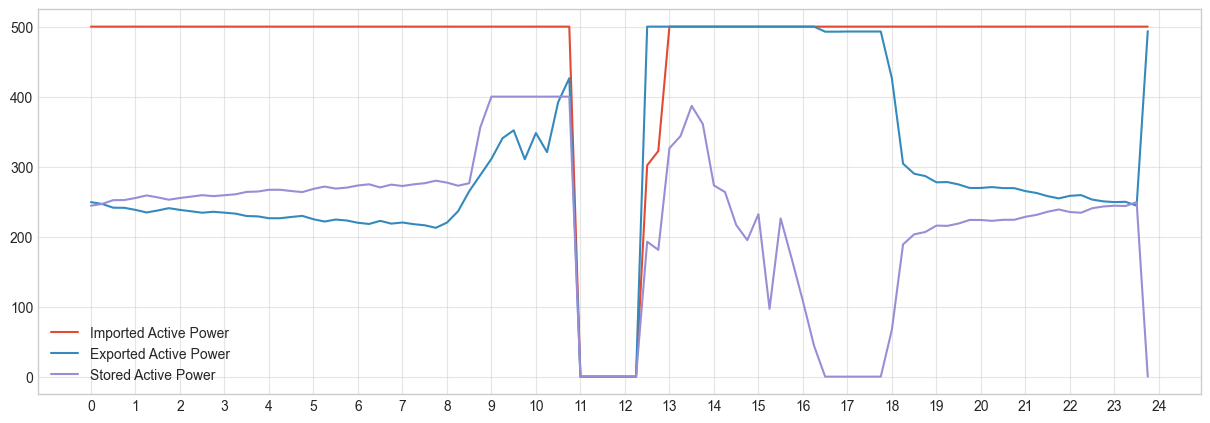

In [142]:
figure = plt.figure(figsize=(15, 5))
plt.plot(new_hours, test_data['imported_active_power_in_kilowatts'], label='Imported Active Power')
plt.plot(new_hours, test_data['exported_active_power_in_kilowatts'], label='Exported Active Power')
plt.plot(new_hours, test_data['building_power_consumption_in_kilowatts'], label='Stored Active Power')
plt.xticks(np.arange(0, new_hours[-1] + 1, step=1))
plt.grid(True, alpha=0.5)
plt.legend()

In [143]:
def downsample_array_with_average_values(array_to_resample: np.array, resample_length: int) -> np.array:
    array_to_resample_length = len(array_to_resample)
    batch_size = int(array_to_resample_length / resample_length)
    average_list = []
    for index in np.arange(start=0, stop=array_to_resample_length, step=batch_size):
        average_value = np.mean(array_to_resample[index: index+batch_size])
        average_list.append(average_value)
    return np.array(average_list[:resample_length])

In [144]:
array_to_resample = np.array(test_data['active_power_demand_base_in_kilowatts'])
resample_length = len(test_data['imported_active_power_in_kilowatts'])
resampled_active_power_demand_base_in_kilowatts = downsample_array_with_average_values(array_to_resample=array_to_resample, resample_length=resample_length)


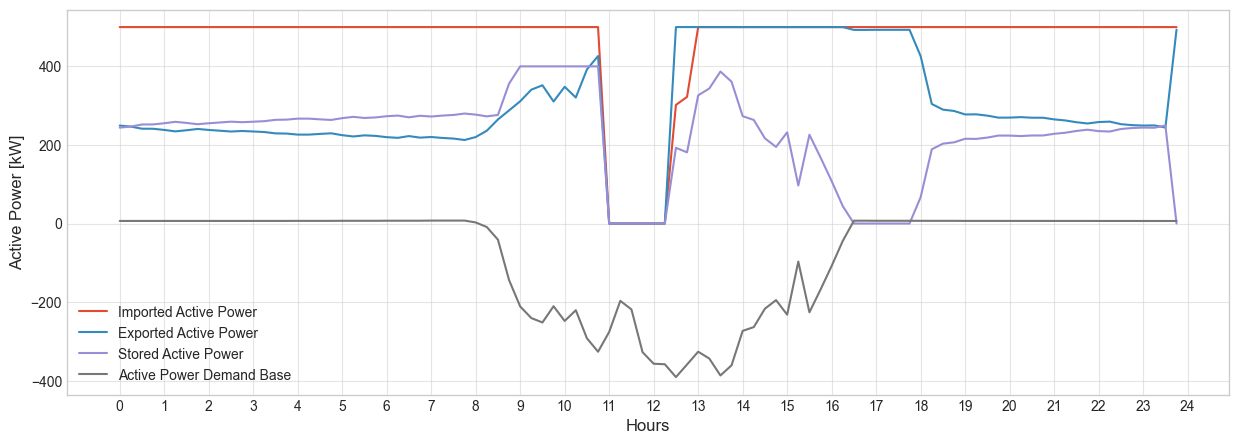

In [145]:
figure = plt.figure(figsize=(15, 5))
plt.plot(new_hours, test_data['imported_active_power_in_kilowatts'], label='Imported Active Power')
plt.plot(new_hours, test_data['exported_active_power_in_kilowatts'], label='Exported Active Power')
plt.plot(new_hours, test_data['building_power_consumption_in_kilowatts'], label='Stored Active Power')
plt.plot(new_hours, resampled_active_power_demand_base_in_kilowatts, label='Active Power Demand Base')
plt.xticks(np.arange(0, new_hours[-1] + 1, step=1))
plt.xlabel('Hours')
plt.ylabel('Active Power [kW]')
plt.grid(True, alpha=0.5)
plt.legend();

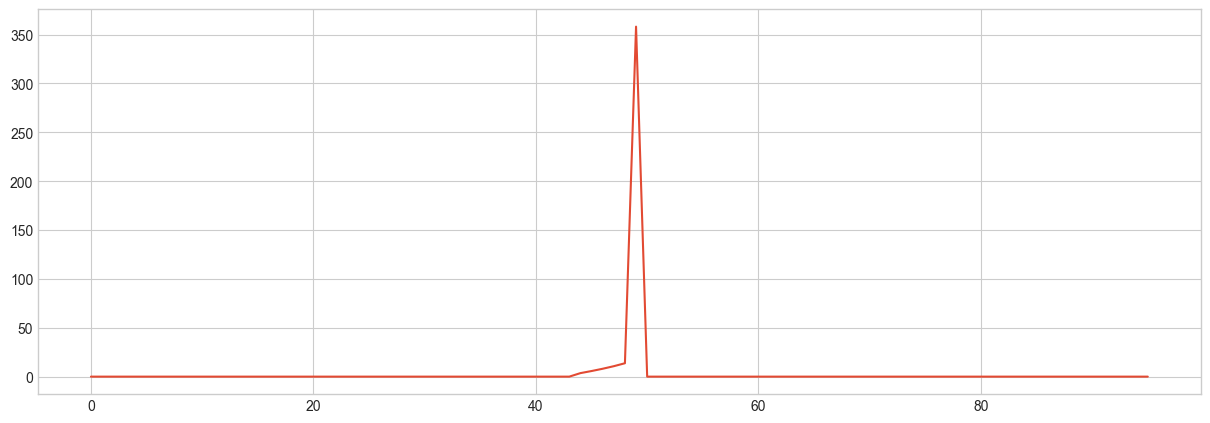

In [146]:
figure = plt.figure(figsize=(15, 5))

plt.plot(data['storage_asset_charge_or_discharge_power_in_kilowatts'][0])

## 4. Economic results

### 4.1. Format the columns for better display

In [147]:
data[['FirstString','MonthNumber', 'Case']] = data['FolderName'].str.split('_', expand=True)


In [148]:
data['MonthNumber'][0]

'1'

In [149]:
data['Month'] = [calendar.month_name[int(month_number)] for month_number in data['MonthNumber']]

In [150]:
data.rename(columns={'revenue': 'Revenue [€]'}, inplace=True);

In [151]:
economic_results = data[['Month', 'Case', 'Revenue [€]']]
economic_results

,Month,Case,Revenue [€]
0,January,Commercial-275-bed Hospital,821.92
1,February,Commercial-275-bed Hospital,567.44
2,March,Commercial-275-bed Hospital,72.71
3,April,Commercial-275-bed Hospital,243.71
4,May,Commercial-275-bed Hospital,-51.88
...,...,...,...
67,August,Reference-Office,-54.89
68,September,Reference-Office,-34.49
69,October,Reference-Office,284.01
70,November,Reference-Office,513.77


In [152]:
path = 'C:/python/personal/my-open/notebooks/20230703-090301/excels'
file_name = 'economic_results.xlsx'
path_file_name = f'{path}/{file_name}'
economic_results.to_excel(path_file_name)

## 4.2. Group by case

### 4.2.1. By Case

In [153]:
economic_results.groupby(by=['Case']).sum().sort_values(by='Case')

,Revenue [€]
Case,
Commercial-275-bed Hospital,3133.46
Commercial-450-bed Hospital,3625.43
Commercial-Office,2911.60
Reference-Hospital,2880.35
Reference-Hotel,2866.53
Reference-Office,2894.67


In [154]:
economic_results.groupby(by=['Case']).mean().sort_values(by='Case')

,Revenue [€]
Case,
Commercial-275-bed Hospital,261.121667
Commercial-450-bed Hospital,302.119167
Commercial-Office,242.633333
Reference-Hospital,240.029167
Reference-Hotel,238.877500
Reference-Office,241.222500


In [155]:
economic_results.loc[economic_results.groupby('Case')['Revenue [€]'].idxmax()].sort_values('Case')

,Month,Case,Revenue [€]
0,January,Commercial-275-bed Hospital,821.92
12,January,Commercial-450-bed Hospital,864.39
24,January,Commercial-Office,796.66
36,January,Reference-Hospital,790.56
48,January,Reference-Hotel,792.59
60,January,Reference-Office,790.55


In [156]:
economic_results.loc[economic_results.groupby('Case')['Revenue [€]'].idxmin()].sort_values('Case')

,Month,Case,Revenue [€]
5,June,Commercial-275-bed Hospital,-82.56
17,June,Commercial-450-bed Hospital,-37.57
29,June,Commercial-Office,-100.29
41,June,Reference-Hospital,-102.94
53,June,Reference-Hotel,-104.74
65,June,Reference-Office,-100.20


### 4.2.2. By Month

In [157]:
economic_results.groupby(by='Month').mean().sort_values(by='Revenue [€]')

,Revenue [€]
Month,
June,-88.050000
May,-52.096667
August,-42.493333
September,-20.110000
July,-16.780000
March,68.961667
April,237.918333
October,292.408333
November,522.486667


In [158]:
economic_results.groupby(by='Month').max().sort_values(by='Revenue [€]')['Revenue [€]']

Month
June         -37.57
May           -8.36
August         4.17
September     28.10
July          30.24
March        105.09
April        289.05
October      339.17
November     571.15
February     601.76
December     838.24
January      864.39
Name: Revenue [€], dtype: float64

In [159]:
economic_results.groupby(by='Month').min().sort_values(by='Revenue [€]')['Revenue [€]']

Month
June        -104.74
May          -66.11
August       -58.90
July         -35.18
September    -34.49
March         56.35
April        220.06
October      275.97
November     503.93
February     537.55
December     764.64
January      790.55
Name: Revenue [€], dtype: float64

## 4.3. Plot the revenue evolution per case 

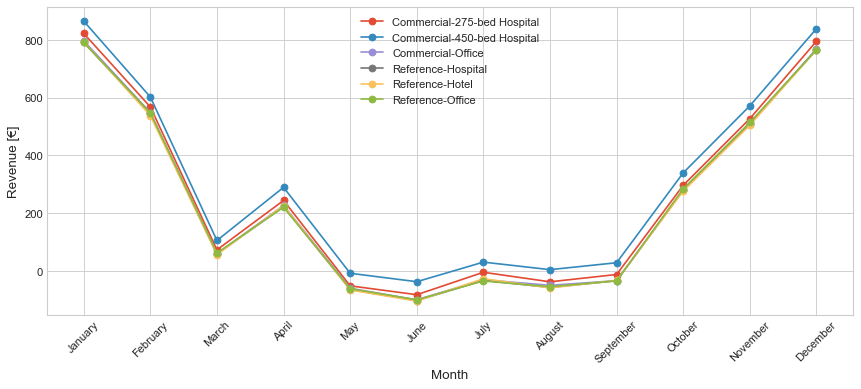

In [160]:
cases = economic_results['Case'].unique()
figure = plt.figure(num=None, figsize=(13, 5), dpi=80, facecolor='w', edgecolor='k')
for case in cases:
    specific_economic_results = economic_results[economic_results['Case'] == case]
    plt.plot(specific_economic_results['Month'], specific_economic_results['Revenue [€]'], label=case, marker='o')
    plt.xticks(rotation=45)
    plt.xlabel('Month')
    plt.ylabel('Revenue [€]')
    plt.grid()
    plt.legend()

6

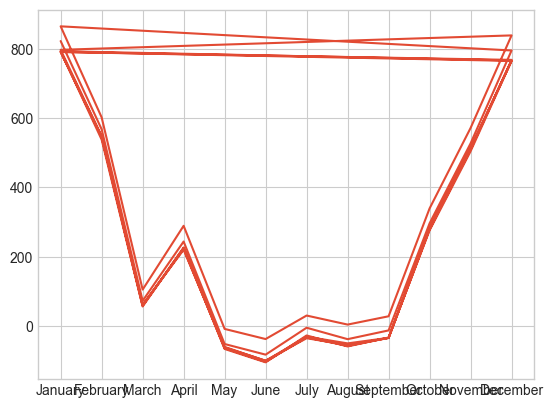